In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('play_tennis.csv')
df.drop(["day"],axis=1,inplace=True)

In [3]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
df["humidity"].value_counts()

humidity
High      7
Normal    7
Name: count, dtype: int64

In [5]:
df["outlook"].value_counts()

outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64

In [6]:
df["temp"].value_counts()

temp
Mild    6
Hot     4
Cool    4
Name: count, dtype: int64

In [7]:
df["wind"].value_counts()

wind
Weak      8
Strong    6
Name: count, dtype: int64

In [8]:
df.dtypes

outlook     object
temp        object
humidity    object
wind        object
play        object
dtype: object

In [9]:
X = df.drop(["play"], axis=1)
y= df["play"]

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [11]:
cat_features = X.select_dtypes(include="object").columns   #['outlook', 'temp', 'humidity', 'wind']
ohe = OneHotEncoder(drop="first")
preprocessor = ColumnTransformer(
    transformers=[
        ("oneHotEncoder",ohe,cat_features)
    ],remainder='passthrough'
)


In [12]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
from sklearn.naive_bayes import BernoulliNB
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred = Bnb.predict(X_test)

In [14]:
import matplotlib.pyplot as plt

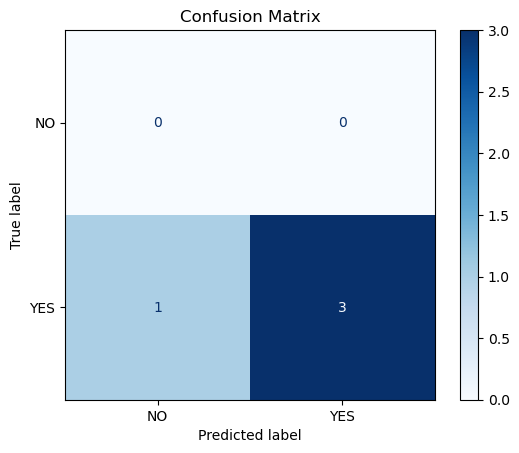

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO','YES'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.75
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



In [17]:
import pickle
pickle.dump(Bnb,open('bnb.pkl','wb'))

In [18]:
X_sample_data = pd.DataFrame([['Sunny','Cool','High','Strong']], columns=['outlook', 'temp', 'humidity', 'wind'])
X_sample_data

,outlook,temp,humidity,wind
0,Sunny,Cool,High,Strong


In [19]:
X_sample = preprocessor.transform(X_sample_data)
y_sample_result = Bnb.predict(X_sample)
y_sample_result

array(['No'], dtype='<U3')